# Regression

Data from here <href>https://www.kaggle.com/uciml/adult-census-income</href>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_original = pd.read_csv('adult.csv')

In [3]:
df_original.relationship.unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [4]:
df_original.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Let's do the same cleaning as in Module 9

In [5]:
df = df_original.replace('?', np.NaN)
df = pd.get_dummies(data=df,columns=['workclass','marital.status',\
            'occupation','relationship','race','sex', 'native.country'])
df.drop(['education'],axis=1,inplace=True)
df.income = df.apply(lambda row : 1.0 if row['income'].startswith('>') \
                     else 0.0, axis=1)

In [6]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Make <i>X</i> and <i>Y</i>
We want to explain (or predict) "age". We need to remove some attributes that are obviously correlated to age, such as some marital.status values.

In [7]:
X = df.drop('age',axis=1)
# remove some attributes that are clearly correlated with age
X = X.drop(['marital.status_Never-married','marital.status_Widowed',\
            'marital.status_Divorced', 'relationship_Own-child'],axis=1)

Y = df.age

# Regression for Data Exploration

## Lasso

Lasso will try to minimize the number of attributes used for the prediction, which gives us insights about which attributes are most important.

In [8]:
from sklearn import linear_model
regLasso = linear_model.Lasso()

In [9]:
regLasso.fit(X,Y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Explore relevant attributes

In [10]:
regLasso.coef_

array([-9.21748260e-06,  0.00000000e+00,  1.17778388e-04,  1.52136612e-03,
        1.86349706e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -5.12760008e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  2.26018199e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        2.17116054e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [11]:
d = {X.columns[i] : regLasso.coef_[i] for i in range(0,len(X.columns))}

Convert it to a series...

In [12]:
s = pd.Series(d)

In [13]:
s[s != 0]

fnlwgt                              -0.000009
capital.gain                         0.000118
capital.loss                         0.001521
hours.per.week                       0.018635
workclass_Private                   -0.512760
marital.status_Married-civ-spouse    2.260182
relationship_Husband                 2.171161
dtype: float64

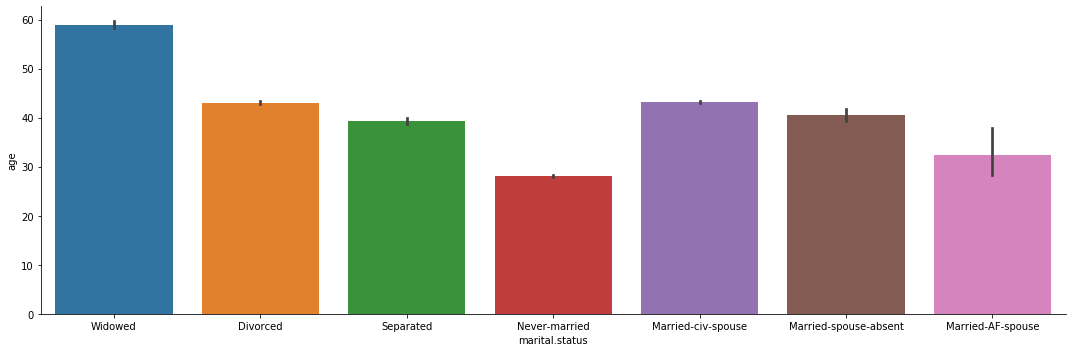

In [14]:
import seaborn as sns
sns.catplot(y='age', x='marital.status',data=df_original,\
            kind = 'bar',aspect=3)

This one does not seem to be a very strong finding.

## Decision Tree Regressor

Decision tree regressors predict one fixed value depending on the leaf reached by the object.

Build and train

In [15]:
import sklearn.tree

In [16]:
dt = sklearn.tree.DecisionTreeRegressor(max_depth = 2)

In [17]:
dt.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Visualize the tree

In [18]:
Y.mean()

38.58164675532078

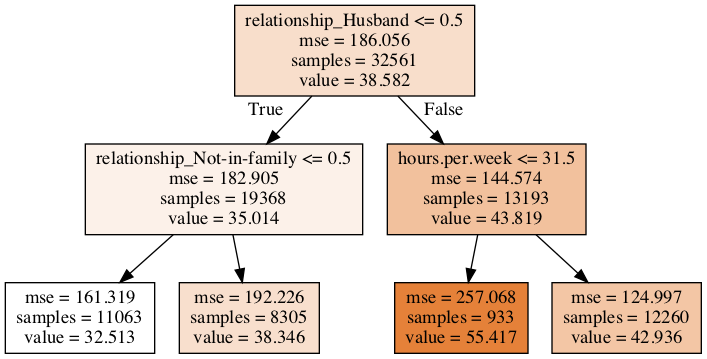

In [19]:
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

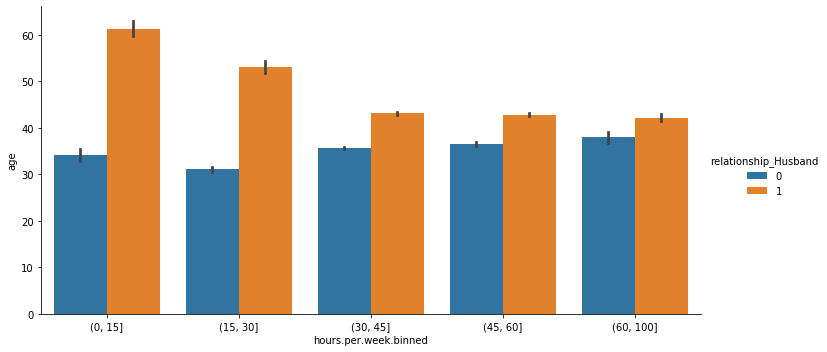

In [20]:
df2 = df.copy()
df2['hours.per.week.binned'] = pd.cut(df2['hours.per.week'],\
                                    bins=[0,15,30,45,60,100])
sns.catplot(x='hours.per.week.binned', y='age',hue='relationship_Husband',\
            data=df2,kind='bar', aspect = 2)

<b>Finding</b>: husbands who work fewer hours per week tend to be older (this is not true for non-husbands)

# Regression for Prediction

Let's split X and Y into training and test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,
                            test_size=0.3,random_state=0)

Train and predict with Lasso

In [23]:
regLasso = linear_model.Lasso()

In [24]:
regLasso.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
y_pred = regLasso.predict(X_test)

In [26]:
y_pred

array([35.47390282, 35.56531064, 36.79449155, ..., 37.06533673,
       36.80353969, 41.83799684])

## Metrics

### Mean absolute error / Mean Absolute Deviation (MAD)

The average of the absolute values of the errors

In [27]:
y_pred

array([35.47390282, 35.56531064, 36.79449155, ..., 37.06533673,
       36.80353969, 41.83799684])

#### Mean absolute error / MAD

In [28]:
(y_pred - Y_test).abs().mean()

10.598905097988752

#### Mean squared error / MSE

The average of the errors squared

In [29]:
((y_pred - Y_test)**2).mean()

167.66862466518234

## Find the best regressors

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

regs = [LinearRegression(), ElasticNet(), DecisionTreeRegressor(), GradientBoostingRegressor(), MLPRegressor()]#, SVR()]
 

Find the predictor that minimizes the cross-validated MAD.

In [31]:
from sklearn.model_selection import KFold

In [32]:
minMAD = 10000000
nfolds = 3
bestREG = ''

for reg in regs:
    kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)
    mad = sklearn.model_selection.cross_val_score(reg,X,Y,\
             cv=kf,scoring='neg_mean_absolute_error').mean()
    # need the lowest scoring for mad
    print (str(reg)[:25] + ' with mad= ' + str(mad) )
    if mad < minMAD:
        minMAD = mad
        bestREG = reg
        
print('***********************************************')
print ('Best Regressor is... ' + str(bestREG)[:25] )
print('**********************')
print ('With MAD Score ' + str(minMAD))
        

LinearRegression(copy_X=T with mad= -9.187725196016059
ElasticNet(alpha=1.0, cop with mad= -10.635171184819805
DecisionTreeRegressor(cri with mad= -11.43543445414423
GradientBoostingRegressor with mad= -8.774746043045653
MLPRegressor(activation=' with mad= -41.32023895547362
***********************************************
Best Regressor is... MLPRegressor(activation='
**********************
With MAD Score -41.32023895547362


**Tech Note** The scoring='neg_mean_absolute_error' option should be read as 'more negative value has better result'. But this is very confusing. Refer to github discussion: https://github.com/scikit-learn/scikit-learn/issues/2439